In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format ='retina'
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import pandas_datareader.data as web

In [2]:
start = datetime(2017,3,23)
#end = datetime(2021,1,1)
end = datetime.today()
df = web.DataReader(['^GSPC','^VIX'],'yahoo',start,end)

In [3]:
df_close = df.loc[:,'Close']
df_close.loc[:,'Year'] = df.loc[:,'Close'].index.year
df_close['^GSPC 1m ATMf Vol'] = df_close['^VIX'] - 5

/Users/thibaut/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/thibaut/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/Users/thibaut/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [4]:
df_close

Symbols,^GSPC,^VIX,Year,^GSPC 1m ATMf Vol
Date,,,,
2017-03-23,2345.959961,13.120000,2017,8.120000
2017-03-24,2343.979980,12.960000,2017,7.960000
2017-03-27,2341.590088,12.500000,2017,7.500000
2017-03-28,2358.570068,11.530000,2017,6.530000
2017-03-29,2361.129883,11.420000,2017,6.420000
...,...,...,...,...
2021-12-06,4591.669922,27.180000,2021,22.180000
2021-12-07,4686.750000,21.889999,2021,16.889999
2021-12-08,4701.209961,19.900000,2021,14.900000


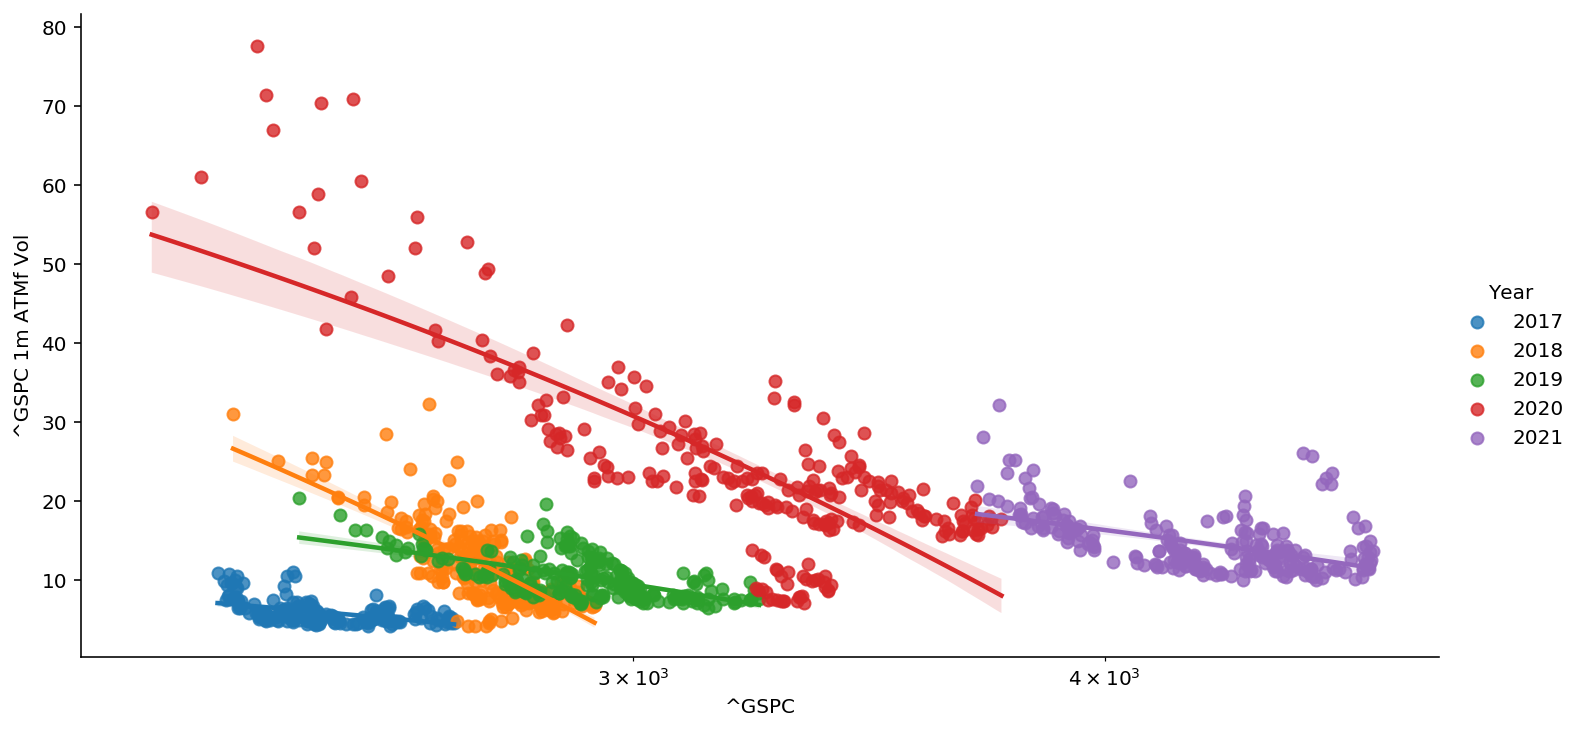

In [5]:
fig,ax = plt.subplots(1)
g = sns.lmplot(data=df_close,x='^GSPC',y='^GSPC 1m ATMf Vol',hue='Year',height=5,aspect=2)
#sns.lmplot(data=df_close_it_imp,x='^GSPC',y='^VIX',hue='year',logx=True,height=5,aspect=2)
#plt.xscale('log')
#ax.set_xscale('log')
g.set(xscale='log')
#ax.xaxis.set_minor_formatter(FormatStrFormatter('%.f'))
#ax.xaxis.set_major_formatter(ScalarFormatter())
plt.close(fig)

In [6]:
df_ytd = df_close[df_close.index.year == df_close.index.year.max()]

In [7]:
spot_ytd_low = df_close['^GSPC'][df_ytd['^GSPC'].idxmin()]
spot_live = df_close['^GSPC'][df_close['^GSPC'].last_valid_index()]
print(spot_ytd_low)
ytd_low_vol = df_close.loc[df_ytd['^GSPC'].idxmin(),'^GSPC 1m ATMf Vol']

3700.64990234375


In [8]:
skew_live = {0.7:54,0.8:38,0.9:22,0.95:14.5,1:11.5,1.05:12,1.1:15,1.2:30}
skew_ytd_low = {0.7:ytd_low_vol*3.2,0.8:ytd_low_vol*2.4,0.9:ytd_low_vol*1.7,0.95:ytd_low_vol*1.35,1:ytd_low_vol,1.05:ytd_low_vol*0.85,1.1:ytd_low_vol*0.95,1.2:ytd_low_vol*1.25}

In [9]:
df_append = pd.DataFrame()
for i in range(len(skew_live.items())):
    df_append = pd.concat([df_append,pd.DataFrame([(x*spot_live,y) for (x,y) in skew_live.items()][i],index=['^GSPC','^GSPC 1m ATMf Vol'],columns=['Live']).transpose()])

In [10]:
for i in range(len(skew_ytd_low.items())):
    df_append = pd.concat([df_append,pd.DataFrame([(x*spot_ytd_low,y) for (x,y) in skew_ytd_low.items()][i],index=['^GSPC','^GSPC 1m ATMf Vol'],columns=['YTD Low']).transpose()])

In [11]:
df_append

,^GSPC,^GSPC 1m ATMf Vol
Live,3298.414014,54.000000
Live,3769.616016,38.000000
Live,4240.818018,22.000000
Live,4476.419019,14.500000
Live,4712.020020,11.500000
Live,4947.621021,12.000000
Live,5183.222021,15.000000
Live,5654.424023,30.000000
YTD Low,2590.454932,70.303998
YTD Low,2960.519922,52.727998


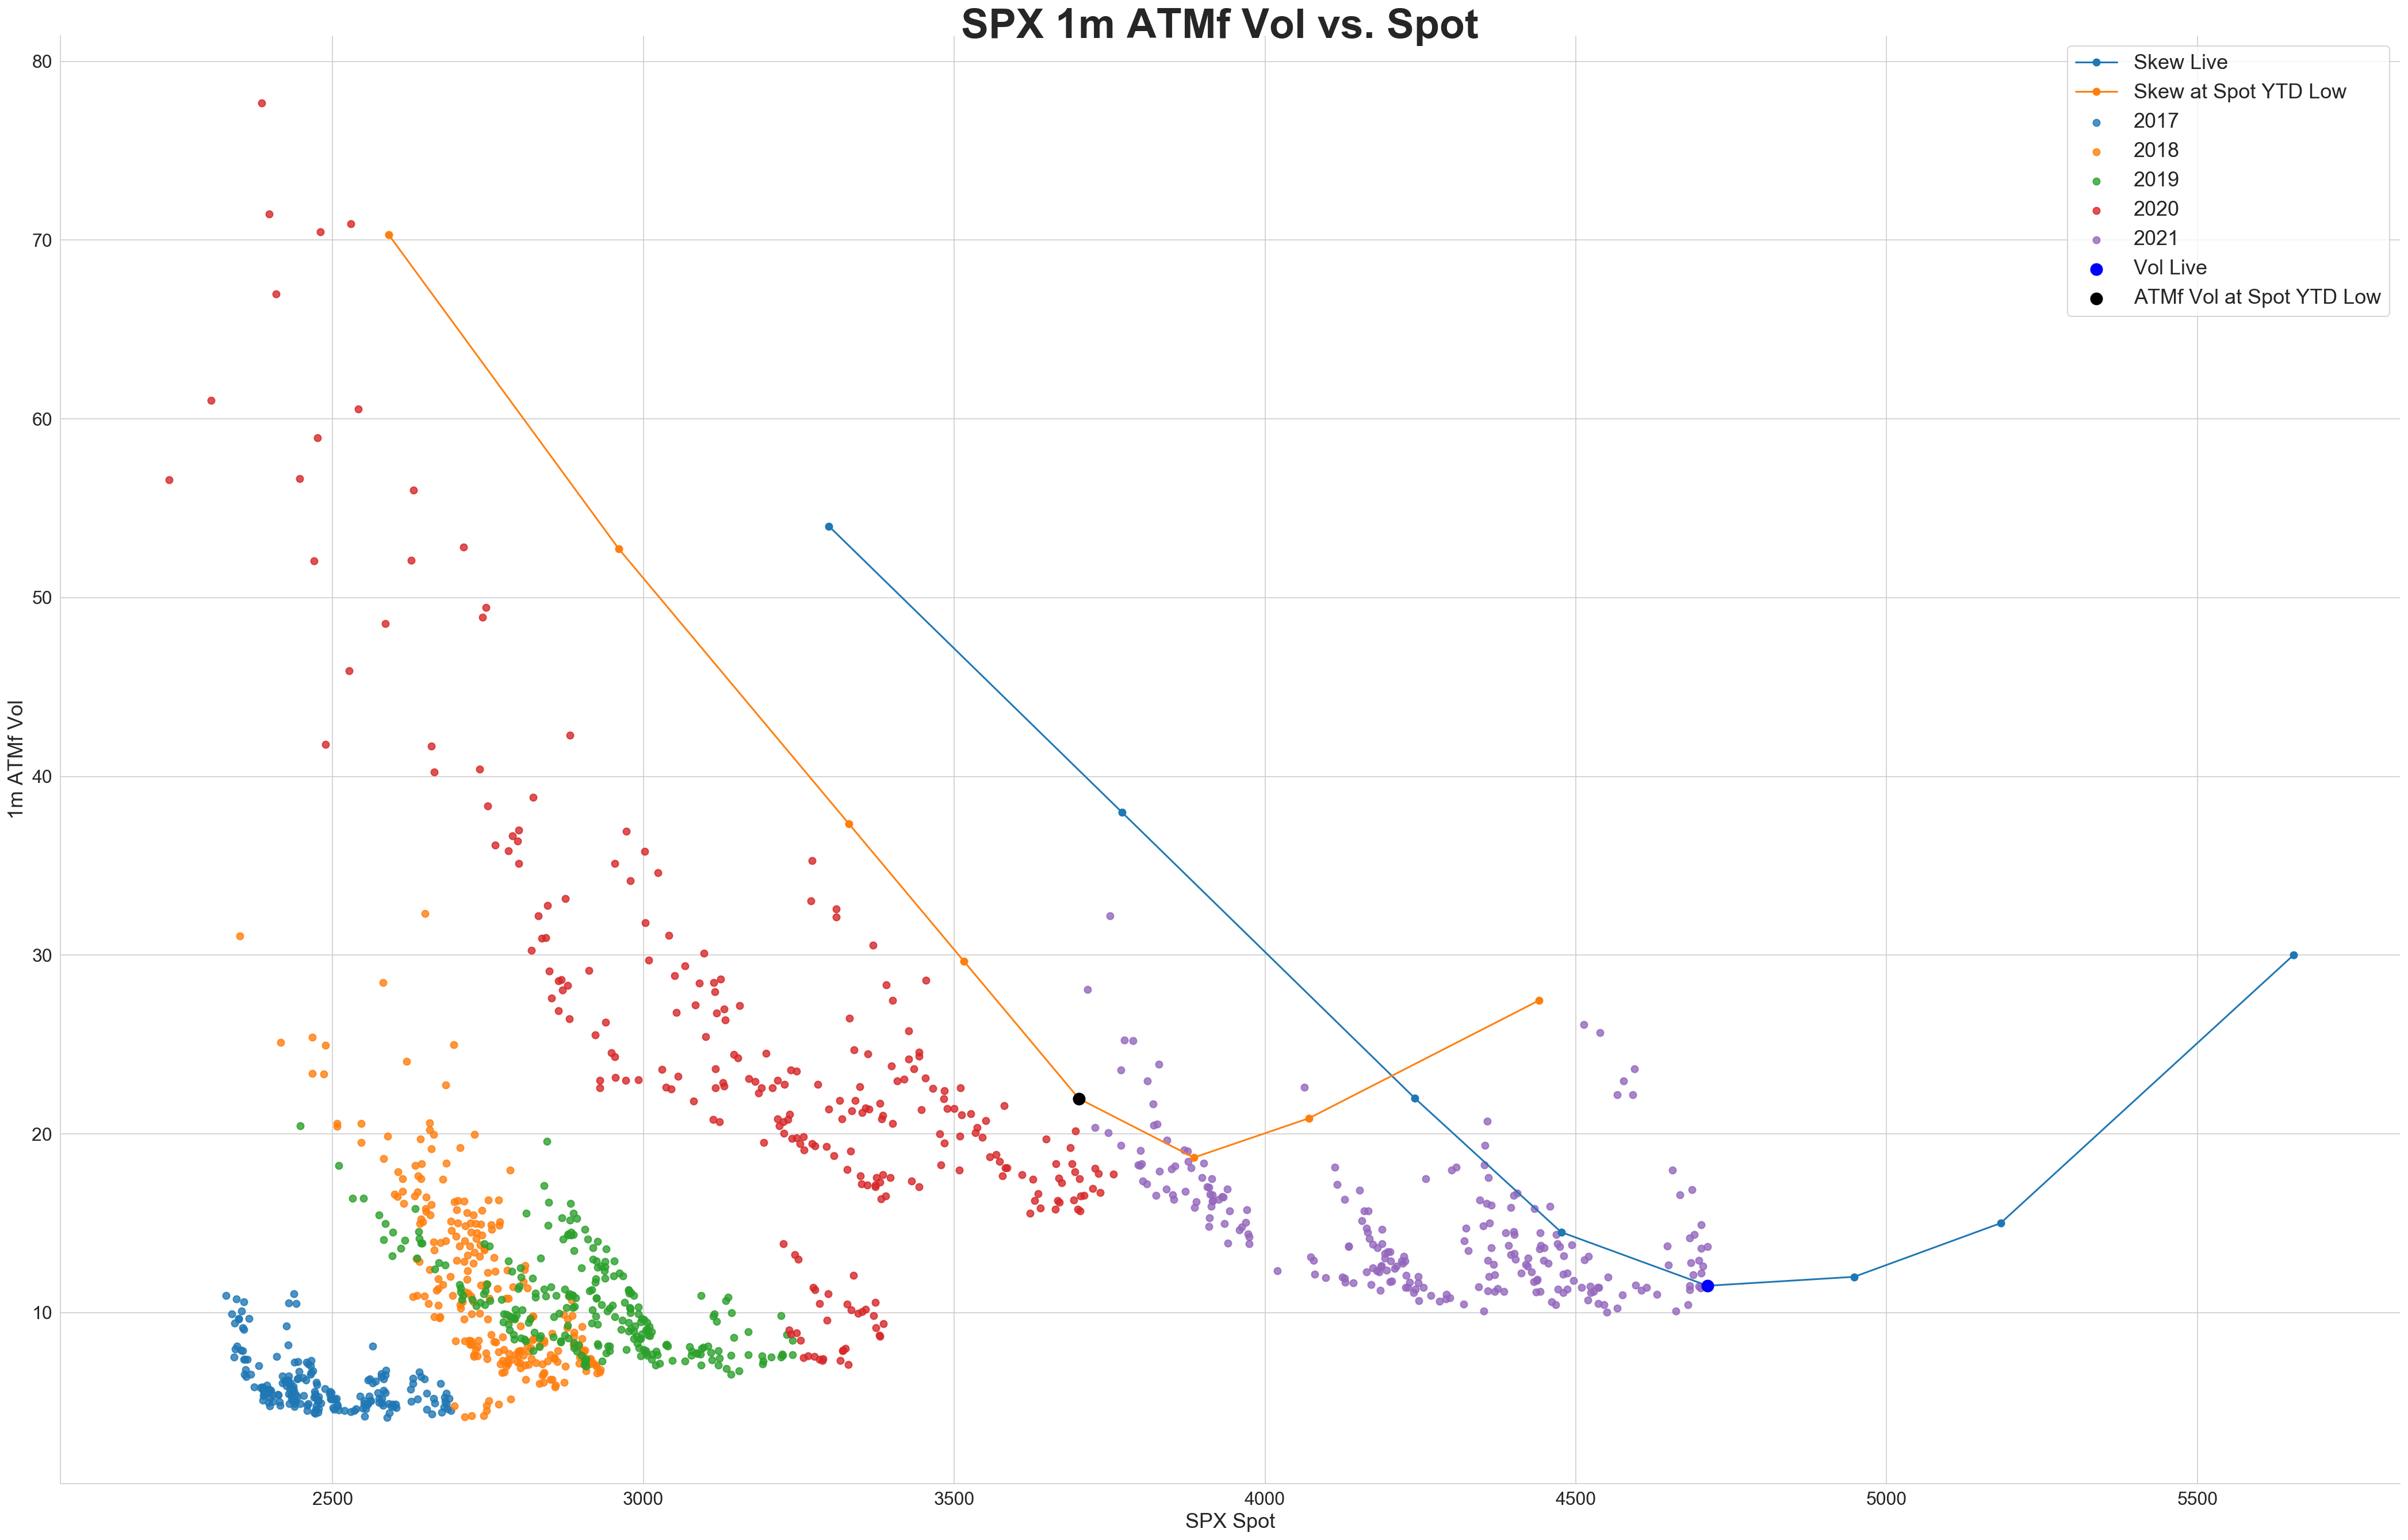

In [12]:
sns.set_style('whitegrid')
sns.lmplot(data=df_close,x='^GSPC',y='^GSPC 1m ATMf Vol',hue='Year',logx=False,aspect=1.6,height=18,ci=False,fit_reg=False,legend_out=False)
g.set(xlim=[1500,4500])

plt.plot(df_append.loc['Live','^GSPC'],df_append.loc['Live','^GSPC 1m ATMf Vol'],linestyle='-',marker='o',label='Skew Live',zorder=1)
plt.plot(df_append.loc['YTD Low','^GSPC'],df_append.loc['YTD Low','^GSPC 1m ATMf Vol'],linestyle='-',marker='o',label='Skew at Spot YTD Low',zorder=1)
plt.suptitle('SPX 1m ATMf Vol vs. Spot',fontweight='bold',fontsize=36,y=1.01)

plt.scatter(y=skew_live[1],x=spot_live,marker='o',label='Vol Live',color='blue',s=100,zorder=2)
plt.scatter(y=skew_ytd_low[1],x=spot_ytd_low,marker='o',label='ATMf Vol at Spot YTD Low',color='black',s=100,zorder=2)

plt.xlabel('SPX Spot',fontsize=18)
plt.xticks(fontsize=16)
plt.ylabel('1m ATMf Vol',fontsize=18)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)
plt.show()